In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
from pandas import DataFrame, Series

In [3]:
# Example PLOT_FNs: pie, scatter, bar, line
# Series.plot.PLOT_FN(...)
# DataFrame.plot.PLOT_FN(...)

In [4]:
s = Series([5000000, 3000000, 2000000])
s

0    5000000
1    3000000
2    2000000
dtype: int64

In [5]:
%matplotlib inline

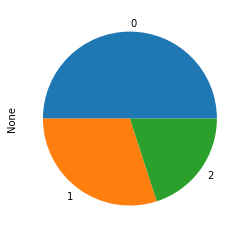

In [6]:
s.plot.pie()

In [7]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 18

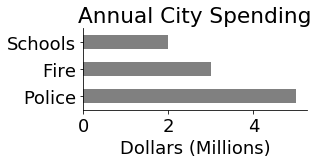

In [8]:
s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})
ax = (s / 1000000).plot.barh(figsize=(4, 1.5), color="0.5")
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

Text(0.5, 1.0, 'Annual City Spending')

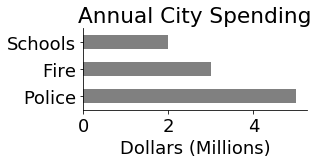

In [9]:
def get_ax(height=3):
    _, ax = plt.subplots(figsize=(4, height))
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    return ax

s = Series({"Police": 5000000, "Fire": 3000000, "Schools": 2000000})
ax = get_ax(1.5)
(s / 1000000).plot.barh(color="0.5", ax=ax)
ax.set_xlabel("Dollars (Millions)")
ax.set_title("Annual City Spending")

In [10]:
import sqlite3
import os

In [11]:
path = "bus.db"
assert os.path.exists(path)
conn = sqlite3.connect(path)

In [12]:
pd.read_sql("""
SELECT * FROM sqlite_master
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,boarding,boarding,2,"CREATE TABLE ""boarding"" (\n""index"" INTEGER,\n ..."
1,index,ix_boarding_index,boarding,3,"CREATE INDEX ""ix_boarding_index""ON ""boarding"" ..."
2,table,routes,routes,55,"CREATE TABLE ""routes"" (\n""index"" INTEGER,\n ""..."
3,index,ix_routes_index,routes,57,"CREATE INDEX ""ix_routes_index""ON ""routes"" (""in..."


In [13]:
# what are the top routes, and how many people ride them daily?

In [14]:
pd.read_sql("SELECT * FROM boarding LIMIT 3", conn)

,index,StopID,Route,Lat,Lon,DailyBoardings
0,0,1163,27,43.073655,-89.385427,1.03
1,1,1163,47,43.073655,-89.385427,0.11
2,2,1163,75,43.073655,-89.385427,0.34


In [15]:
# GUESS top routes: 80, 10, 28, 6, 1, 13
df = pd.read_sql("""
SELECT Route, SUM(DailyBoardings) AS daily
FROM boarding
GROUP BY Route
ORDER BY daily DESC
""", conn)
df = df.set_index("Route")
df.head()

,daily
Route,
80,10211.79
2,4808.03
6,4537.02
10,4425.23
3,2708.55


In [16]:
s = df["daily"].iloc[:5]
s["other"] = df["daily"].iloc[5:].sum()
s

Route
80       10211.79
2         4808.03
6         4537.02
10        4425.23
3         2708.55
other    29296.56
Name: daily, dtype: float64

Text(0, 0.5, 'Rides/Day (Thousands)')

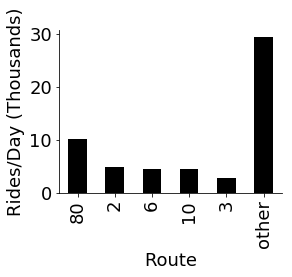

In [17]:
ax = get_ax()
(s/1000).plot.bar(color="k", ax=ax)
ax.set_ylabel("Rides/Day (Thousands)")

In [18]:
trees = [
    {"age": 1, "height": 1.5, "diameter": 0.8},
    {"age": 1, "height": 1.9, "diameter": 1.2},
    {"age": 1, "height": 1.8, "diameter": 1.4},
    {"age": 2, "height": 1.8, "diameter": 0.9},
    {"age": 2, "height": 2.5, "diameter": 1.5},
    {"age": 2, "height": 3, "diameter": 1.8},
    {"age": 2, "height": 2.9, "diameter": 1.7},
    {"age": 3, "height": 3.2, "diameter": 2.1},
    {"age": 3, "height": 3, "diameter": 2},
    {"age": 3, "height": 2.4, "diameter": 2.2},
    {"age": 2, "height": 3.1, "diameter": 2.9},
    {"age": 4, "height": 2.5, "diameter": 3.1},
    {"age": 4, "height": 3.9, "diameter": 3.1},
    {"age": 4, "height": 4.9, "diameter": 2.8},
    {"age": 4, "height": 5.2, "diameter": 3.5},
    {"age": 4, "height": 4.8, "diameter": 4},
]
df = DataFrame(trees)
df.head()

,age,diameter,height
0,1,0.8,1.5
1,1,1.2,1.9
2,1,1.4,1.8
3,2,0.9,1.8
4,2,1.5,2.5


In [19]:
# s.plot.bar()
# index  => x-axis
# values => y-axis

In [20]:
df["diameter"] * 25

0      20.0
1      30.0
2      35.0
3      22.5
4      37.5
5      45.0
6      42.5
7      52.5
8      50.0
9      55.0
10     72.5
11     77.5
12     77.5
13     70.0
14     87.5
15    100.0
Name: diameter, dtype: float64

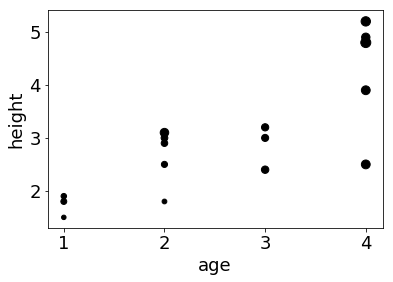

In [21]:
df.plot.scatter(x="age", y="height", s=df["diameter"]*25, c="black")

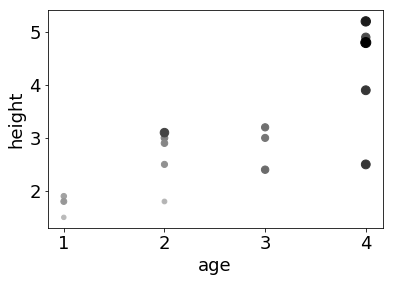

In [22]:
# not recommended: don't use multiple features of the plot for the same var
df.plot.scatter(x="age", y="height", s=df["diameter"]*25,
                c=df["diameter"], vmin=df["diameter"].min()-2)

In [23]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names=["sep-len", "sep-wid", "pet-len", "pet-width", "class"])

In [24]:
df.head()

,sep-len,sep-wid,pet-len,pet-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
df.tail()

,sep-len,sep-wid,pet-len,pet-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [26]:
classes = set(df["class"])
classes

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

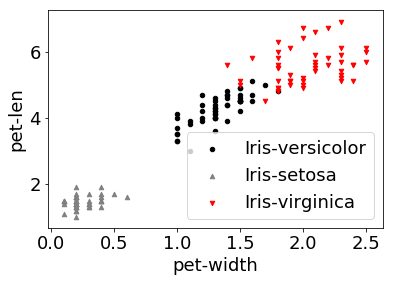

In [44]:
plot_area = None
colors = ["black", "0.5", "red"]
markers = ["o", "^", "v"]
for variety in classes:
    sub_df = df[df["class"] == variety]
    plot_area = sub_df.plot.scatter(x="pet-width", y="pet-len",
                                    ax=plot_area, color=colors.pop(0),
                                    label=variety, marker=markers.pop(0))